In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [2]:
import pandas as pd
from pandas import DataFrame as df

## Data Independent

In [3]:
# Print data Independent
df_X = df(X)
df_X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


<!-- Data set asli memliki 20 data independen, namun yang digunakan pada kalkulasi saat ini hanya 10 variabel diantaranya

|Nama Variabel| Tipe Data | Deksripsi | Satuan|
|:----|:----|:----|:----|
|Attribute2 | Numerik | Durasi Peminjaman | Bulan |
|Attribute3 | Kategori| Riwayat Kredit | |
|Attribute4 | Kategori | Tujuan Kredit | |
|Attribute5 | Numerik | Jumlah Kredit | |
|Attribute6 | Kategori | Rekening Tabungan atau Obligasi | |
|Attribute7 | Kategori | Lama Kerja hingga saat ini | |
|Attribute9 | Kategori | Status Pernikahan | |
|Attribute13 | Numerik | Umur | |
|Attribute15 | Kategori | Kepemilikan Rumah | |
|Attribute16 | Numerik | Jumlah kredit lainnya | | -->

In [4]:
attribute_used = ['Attribute1','Attribute2','Attribute3','Attribute4','Attribute5','Attribute6','Attribute7','Attribute9','Attribute13','Attribute15','Attribute16','Attribute18','Attribute11','Attribute8','Attribute10']
means = ['stat_rek_giro','durasi','rwyt_krdt','tjn_krdt','jml_krdt','jml_tabgn','wkt_krj','stat_nkh','umur','stat_rmh','jml_krdt_lain','tanggungan','lama_tnggl','tkt_cicilan','penjamin']
new_column = {key:value for key, value in zip(attribute_used,means)}

In [5]:
# Hanya mengambil data
df_X_use = df (df_X[attribute_used])
df_X_use = df_X_use.rename(columns=new_column)
df_X_use.tail()

,stat_rek_giro,durasi,rwyt_krdt,tjn_krdt,jml_krdt,jml_tabgn,wkt_krj,stat_nkh,umur,stat_rmh,jml_krdt_lain,tanggungan,lama_tnggl,tkt_cicilan,penjamin
995,A14,12,A32,A42,1736,A61,A74,A92,31,A152,1,1,4,3,A101
996,A11,30,A32,A41,3857,A61,A73,A91,40,A152,1,1,4,4,A101
997,A14,12,A32,A43,804,A61,A75,A93,38,A152,1,1,4,4,A101
998,A11,45,A32,A43,1845,A61,A73,A93,23,A153,1,1,4,4,A101
999,A12,45,A34,A41,4576,A62,A71,A93,27,A152,1,1,4,3,A101


### Merubah data Kategori kedalam bentuk numerik

1. Attribute 1:  (qualitative) Status of existing checking account `0-3`
    * A11 :      ... <    0 DM
    * A12 : 0 <= ... <  200 DM
    * A13 :      ... >= 200 DM / salary assignments for at least 1 year
    * A14 : no checking account
1. Attribute 3 (Riwayat Kredit) `0-4`
    * A30 : no credits taken/ all credits paid back duly
    * A31 : all credits at this bank paid back duly
    * A32 : existing credits paid back duly till now
    * A33 : delay in paying off in the past
    * A34 : critical account/  other credits existing (not at this bank)
2. Attribute 4:  (Tujuan Kredit) `0-10`
    * A40 : car (new)
    * A41 : car (used)
    * A42 : furniture/equipment
    * A43 : radio/television
    * A44 : domestic appliances
    * A45 : repairs
    * A46 : education
    * A47 : (vacation - does not exist?)
    * A48 : retraining
    * A49 : business
    * A410 : others
3. Attibute 6: `0-4`
    * A61 :          ... <  100 DM
    * A62 :   100 <= ... <  500 DM
    * A63 :   500 <= ... < 1000 DM
    * A64 :          .. >= 1000 DM
    * A65 :   unknown/ no savings account
4. Attribute 7:  Present employment since `0-4`
    * A71 : unemployed
    * A72 :       ... < 1 year
    * A73 : 1  <= ... < 4 years
    * A74 : 4  <= ... < 7 years
    * A75 :       .. >= 7 years
5. Attribute 9:  (qualitative) Personal status and sex `0-4`
    * A91 : male   : divorced/separated
    * A92 : female : divorced/separated/married
    * A93 : male   : single
    * A94 : male   : married/widowed
    * A95 : female : single
6. Attribute 15: (qualitative) Housing `0-2`
    * A151 : rent
    * A152 : own
    * A153 : for free



In [6]:
# Mencari nilai unik
pd.set_option('future.no_silent_downcasting', True)
unique_stat_giro = df_X_use.stat_rek_giro.unique()
unique_rwy_krd = df_X_use.rwyt_krdt.unique()
unique_tjn_krdt = df_X_use.tjn_krdt.unique()
unique_jml_tabgn = df_X_use.jml_tabgn.unique()
unique_wkt_krj = df_X_use.wkt_krj.unique()
unique_stat_nkh = df_X_use.stat_nkh.unique()
unique_stat_rmh = df_X_use.stat_rmh.unique()
unique_penjamin = df_X_use.penjamin.unique()


df_X_use.stat_rek_giro = df_X_use.stat_rek_giro.replace(unique_stat_giro,range(0,len(unique_stat_giro)))
df_X_use.rwyt_krdt = df_X_use.rwyt_krdt.replace(unique_rwy_krd,range(0,len(unique_rwy_krd)))
df_X_use.tjn_krdt = df_X_use.tjn_krdt.replace(unique_tjn_krdt,range(0,len(unique_tjn_krdt)))
df_X_use.jml_tabgn = df_X_use.jml_tabgn.replace(unique_jml_tabgn,range(0,len(unique_jml_tabgn)))
df_X_use.wkt_krj = df_X_use.wkt_krj.replace(unique_wkt_krj,range(0,len(unique_wkt_krj)))
df_X_use.stat_nkh = df_X_use.stat_nkh.replace(unique_stat_nkh,range(0,len(unique_stat_nkh)))
df_X_use.stat_rmh = df_X_use.stat_rmh.replace(unique_stat_rmh,range(0,len(unique_stat_rmh)))
df_X_use.penjamin = df_X_use.penjamin.replace(unique_penjamin,range(0,len(unique_penjamin)))

df_X_use.head()

,stat_rek_giro,durasi,rwyt_krdt,tjn_krdt,jml_krdt,jml_tabgn,wkt_krj,stat_nkh,umur,stat_rmh,jml_krdt_lain,tanggungan,lama_tnggl,tkt_cicilan,penjamin
0,0,6,0,0,1169,0,0,0,67,0,2,1,4,4,0
1,1,48,1,0,5951,1,1,1,22,0,1,1,2,2,0
2,2,12,0,1,2096,1,2,0,49,0,1,2,3,2,0
3,0,42,1,2,7882,1,2,0,45,1,1,2,4,2,1
4,0,24,2,3,4870,1,1,0,53,1,2,2,4,3,0


In [7]:
df_X_use.describe()

,durasi,jml_krdt,umur,jml_krdt_lain,tanggungan,lama_tnggl,tkt_cicilan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000,1.407000,1.155000,2.845000,2.973000
std,12.058814,2822.736876,11.375469,0.577654,0.362086,1.103718,1.118715
min,4.000000,250.000000,19.000000,1.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,27.000000,1.000000,1.000000,2.000000,2.000000
50%,18.000000,2319.500000,33.000000,1.000000,1.000000,3.000000,3.000000
75%,24.000000,3972.250000,42.000000,2.000000,1.000000,4.000000,4.000000
max,72.000000,18424.000000,75.000000,4.000000,2.000000,4.000000,4.000000


In [8]:
# Pemilihan data
choosen = means
# choosen = ['stat_rek_giro','durasi','rwyt_krdt','tjn_krdt','jml_krdt','jml_tabgn','wkt_krj','stat_nkh','umur','stat_rmh','jml_krdt_lain','tanggungan','lama_tnggl','tkt_cicilan'] 
# choosen = ['durasi','rwyt_krdt','jml_krdt','jml_tabgn','wkt_krj','umur','stat_rmh','jml_krdt_lain']
df_X_use = df_X_use[choosen]

## Kondisi data dependent

In [9]:
# Print data Dependent
df_y = df(y)
df_y['class'] = df_y['class'].replace([1,2],[0,1])
df_y.head()

,class
0,0
1,1
2,0
3,0
4,1


In [10]:
# Unique class, (0 tidak berisiko, 1 bersiko)
df_y['class'].unique()

df_y['class'] = df_y['class'].replace(df_y['class'].unique(),(0,1))

In [11]:
df_y

,class
0,0
1,1
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,1


In [12]:
# Export data biar bisa digunakan
df_exportConcat = pd.concat([df_X_use, df_y['class']], axis=1)
# df_exportConcat
# df_exportConcat.to_csv('Data/risiko_kredit_germany_data.csv',index=False)

In [13]:
df_y.shape, df_y['class'].ndim


((1000, 1), 1)

In [14]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_X_use, df_y['class'], test_size=0.20, random_state=42)

## Fit The Model

In [15]:
print(df_X_use.shape)
print(df_y.shape)

(1000, 15)
(1000, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
# LogisticRegression

logit_reg = LogisticRegression()
logit_reg.fit(train_X, train_y)

D:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediksi menggunakan model hasil train

In [17]:
pred = logit_reg.predict(test_X)

In [18]:
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [19]:
cnf_matrix = confusion_matrix( test_y, pred)
cnf_matrix

array([[129,  12],
       [ 37,  22]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

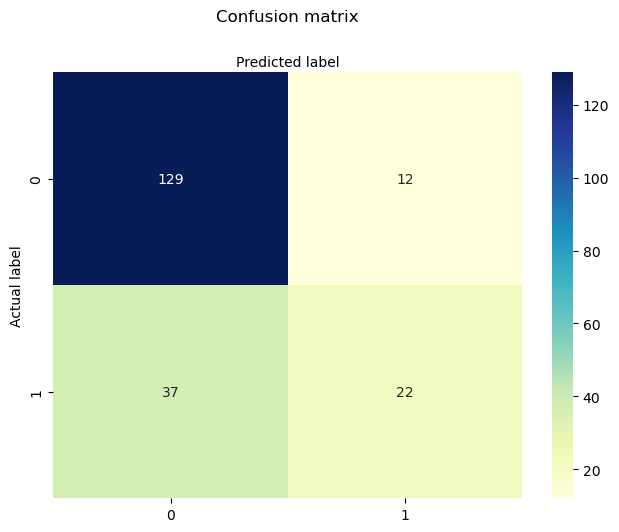

In [20]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import classification_report
target_names = ['Beresiko', 'Tidak Beresiko']
print(classification_report(test_y, pred, target_names=target_names))

                precision    recall  f1-score   support

      Beresiko       0.78      0.91      0.84       141
Tidak Beresiko       0.65      0.37      0.47        59

      accuracy                           0.76       200
     macro avg       0.71      0.64      0.66       200
  weighted avg       0.74      0.76      0.73       200



## ROC (Receiver Operating Characteristic)
Adalah sebuahkurva yang menggambarkan tingkat tingkat _true positive_ terjadap _falase postive_.

(200,)
(72,)
(72,)
(72,)


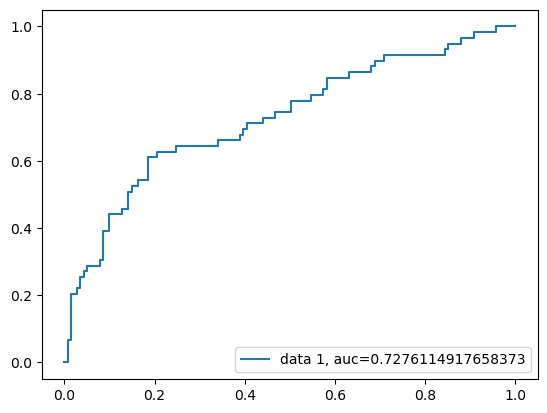

In [30]:
y_pred_proba = logit_reg.predict_proba(test_X)[::,1]
# print(y_pred_proba)
fpr, tpr, threshold = metrics.roc_curve(test_y,  y_pred_proba)
print(test_y.shape)
print(threshold.shape)
print(fpr.shape)
print(tpr.shape)
auc = metrics.roc_auc_score(test_y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score pada model ini adalah 0.72. AUC score 1 menggambarkan pengelompokan yang sempurna, and 0.5 menggambarkan pengelompokan yang buruk.

In [31]:
auc

0.7276114917658373

## Kalkulasi Manual ROC

In [26]:
dfProdba = df(y_pred_proba)
test_y_df = test_y.reset_index()
tableROCMan = pd.concat([dfProdba[0],test_y_df['class']], axis=1,).rename(columns={0:'Prob','class':'Actual'})
df(tableROCMan)

,Prob,Actual
0,0.521752,1
1,0.394740,0
2,0.718448,0
3,0.163562,0
4,0.161273,0
...,...,...
195,0.226311,0
196,0.608917,1
197,0.649325,0
198,0.860545,0
